<a href="https://colab.research.google.com/github/BlackUBird/TMCIT_T5DSP/blob/main/T5_DSP_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# 前準備
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.io.wavfile import read
from numpy.fft import fft, ifft, fftfreq
from IPython.display import Audio



In [64]:
# 誕生日
# 月
myBirthM = 9
# 日(下1桁)
myBirthD_ls = 6


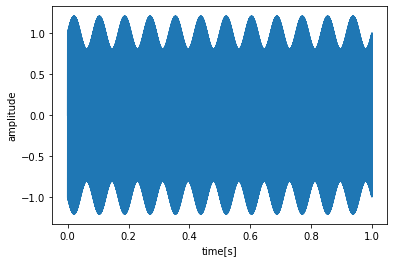

In [65]:
# 信号の生成
# サンプリング周波数
fs = 48000
# 信号長
t = np.arange( 0 , 1 , 1/fs )
# 搬送波の周波数
f_car = myBirthM * 500
# 包絡線の周波数
f_env = myBirthD_ls * 2

# 信号
h = np.sin( 2*np.pi*f_car*t ) * ( 1 + 0.2*np.sin( 2*np.pi*f_env*t ) )

# 表示
plt.plot( t , h )
plt.xlabel( "time[s]" )
plt.ylabel( "amplitude" )

# 音声にする
Audio( h , rate = fs )


48000


Text(0, 0.5, 'signal(fft)(imag)')

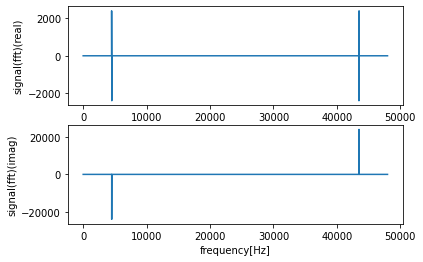

In [66]:
# 解析的信号を生成する
# 元信号をフーリエ変換
H = fft( h )

# 長さを格納
H_len = len( H )
print( H_len )

# 表示
# 実数部
plt.subplot( 2 , 1 , 1 )
plt.plot( H.real )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft)(real)" )
# 虚数部
plt.subplot( 2 , 1 , 2 )
plt.plot( H.imag )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft)(imag)" )



長さ: 48000


Text(0, 0.5, 'signal(fft->OneSided)(imag)')

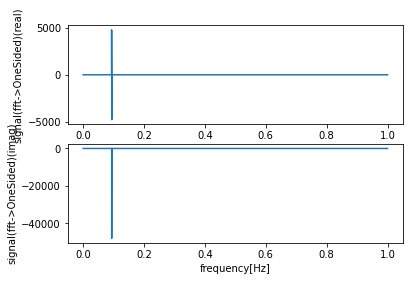

In [67]:
# 片側スペクトルに変換
# 変換
H_sided = H
for k in range( 0 , H_len , 1 ) :
  if k == 0 or k == H_len//2 :
    H_sided[ k ] = H[ k ]
  elif k > 0 and k < H_len//2 :
    H_sided[ k ] = 2*H[ k ]
  else :
    H_sided[ k ] = 0

# 表示
print( "長さ:" , len( H_sided ) )
# 実数部
plt.subplot( 2 , 1 , 1 )
plt.plot( t , H_sided.real )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->OneSided)(real)" )
# 虚数部
plt.subplot( 2 , 1 , 2 )
plt.plot( t , H_sided.imag )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->OneSided)(imag)" )


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'signal(fft->OneSided->ifft)')

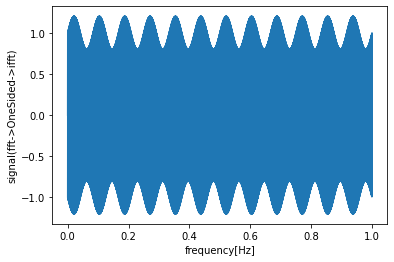

In [68]:
# 片側スペクトルを逆フーリエ変換する
h_sided = ifft( H_sided )

# 表示
plt.plot( t , h_sided )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->OneSided->ifft)" )


Text(0, 0.5, 'signal(ifft)(imag)')

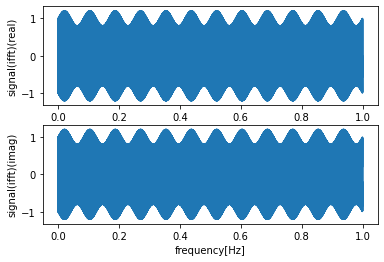

In [69]:
# 片側スペクトルを逆フーリエ変換する
# 実数部
plt.subplot( 2 , 1 , 1 )
plt.plot( t , h_sided.real )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(ifft)(real)" )
# 虚数部
plt.subplot( 2 , 1 , 2 )
plt.plot( t , h_sided.imag )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(ifft)(imag)" )



Text(0, 0.5, 'carrier')

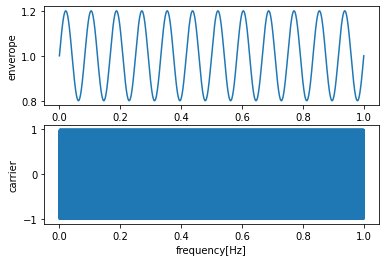

In [70]:
# 包絡線/搬送波を取得する
# 包絡線
env = np.abs( h_sided )
# 搬送波
car = np.cos( np.angle( h_sided ) )

# 表示
# 包絡線
plt.subplot( 2 , 1 , 1 )
plt.plot( t , env )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "enverope" )
# 搬送波
plt.subplot( 2 , 1 , 2 )
plt.plot( t , car )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "carrier" )



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


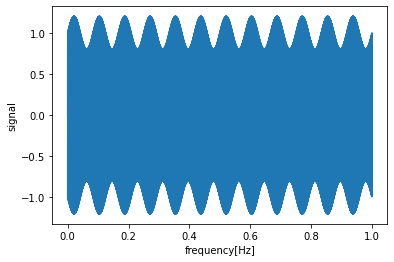

In [71]:
# 再構成する
h_re = env * car

# 表示
plt.plot( t , h_sided )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal" )

# 音声にする
Audio( h_re , rate = fs )
